In [1]:
from __future__ import print_function
from __future__ import unicode_literals
from textblob import TextBlob
import pandas as pd
from __future__ import print_function
from __future__ import division
import nltk

In [2]:
import matplotlib.pyplot as plt

In [3]:
wine = pd.read_csv('/Users/luis/Desktop/master_codes/tfm/winemag-data_first150k.csv',sep=",")

In [4]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
wine = wine.drop_duplicates()

In [6]:
wine = wine.dropna()

In [7]:
wine.variety.nunique()

180

Searching for adjectives in descriptions

In [8]:
wine.description[0]
description_1 = nltk.pos_tag(wine.description[0].split())
tupla = description_1[0]

In [9]:
import string 
def remove_punctuation(review):
    pepe = review.translate(None, string.punctuation)
    return pepe

In [10]:
# removing punctuation from descriptions
wine['description'] = wine['description'].apply(remove_punctuation)

In [11]:
# converting to lowercase letters
wine['description'] = wine['description'].str.lower()

In [12]:
#create list of adjectives in one description
adjective_list = []
for i in range(len(description_1)):
    tupl= description_1[i]
    if tupl[1] == 'JJ':
        adjective_list.append(tupl[0])

In [13]:
adjective_list = []
for description in wine.description:
    description = TextBlob(description.decode('unicode-escape'))
    description = nltk.pos_tag(description.split())
    for i in range(len(description)):
        tupl=description[i]
        if tupl[1] == 'JJ':
            adjective_list.append(tupl[0])   

In [14]:
adjective_list[:10]

[u'tremendous',
 u'varietal',
 u'compelling',
 u'caramel',
 u'elegant',
 u'fine',
 u'subtle',
 u'further',
 u'delicious',
 u'complex']

In [15]:
adjectives = pd.DataFrame({'adjective_list': adjective_list})
df_adj = adjectives.adjective_list.value_counts().sort_values(ascending=False).to_frame().reset_index()

In [16]:
df_adj.head()

,index,adjective_list
0,dry,4819
1,rich,4254
2,black,4153
3,sweet,3281
4,good,2867


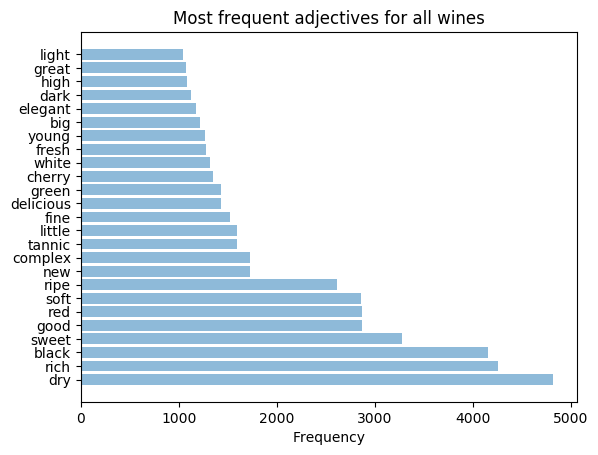

In [17]:
# Barplot of the data
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

adjectives = tuple(df_adj['index'].tolist())[:25]
adjectives = [TextBlob(i.decode('unicode-escape')) for i in adjectives]
y_pos = np.arange(len(adjectives))
performance = np.array(df_adj.adjective_list)[:25]
error = np.random.rand(len(adjectives))


plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, adjectives)
plt.xlabel('Frequency')
plt.title('Most frequent adjectives for all wines')
 
plt.show()

In [18]:
# most common adjectives for bad wines

In [19]:
# we add a new column termed "quality", if points > 90 the wine is high quality, else we consider it low quality
def rating_type(score):
    if score > 94:
        return 1
    if score <= 84:
        return 0
    if score>84 and score<=94:
        return 2

wine['quality'] = wine.points.apply(rating_type)
wine_bad = wine[wine.quality==0]
wine_good = wine[wine.quality==1]

In [20]:
bad_adjective_list = []
for description in wine_bad.description:
    description = TextBlob(description.decode('unicode-escape'))
    description = nltk.pos_tag(description.split())
    for i in range(len(description)):
        tupl=description[i]
        if tupl[1] == 'JJ':
            bad_adjective_list.append(tupl[0])   

In [21]:
bad_adjectives = pd.DataFrame({'adjective_list': bad_adjective_list})
df_adj_bad = bad_adjectives.adjective_list.value_counts().sort_values(ascending=False).to_frame().reset_index()

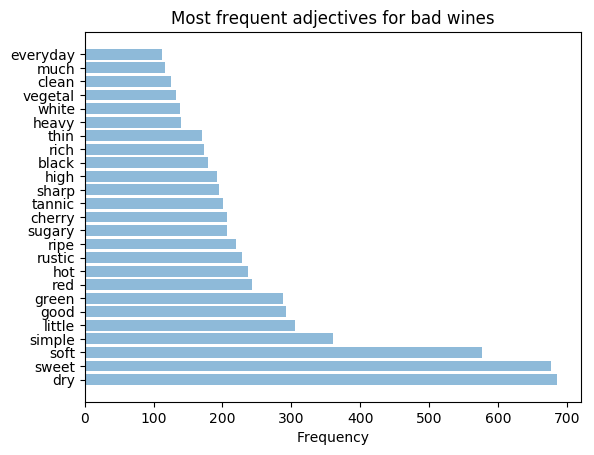

In [22]:
plt.rcdefaults()
fig, ax = plt.subplots()

adjectives = tuple(df_adj_bad['index'].tolist())[:25]
adjectives = [TextBlob(i.decode('unicode-escape')) for i in adjectives]
y_pos = np.arange(len(adjectives))
performance = np.array(df_adj_bad.adjective_list)[:25]
error = np.random.rand(len(adjectives))


plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, adjectives)
plt.xlabel('Frequency')
plt.title('Most frequent adjectives for bad wines')
 
plt.show()

In [23]:
bad_noun_list = []
for description in wine_bad.description:
    description = TextBlob(description.decode('unicode-escape'))
    description = nltk.pos_tag(description.split())
    for i in range(len(description)):
        tupl=description[i]
        if tupl[1] == 'NN':
            bad_noun_list.append(tupl[0])   

In [24]:
bad_nouns = pd.DataFrame({'noun_list': bad_noun_list})
df_noun_bad = bad_nouns.noun_list.value_counts().sort_values(ascending=False).to_frame().reset_index()

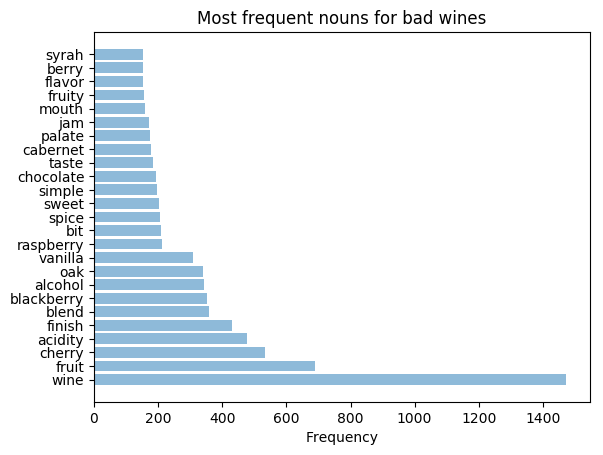

In [25]:
plt.rcdefaults()
fig, ax = plt.subplots()

nouns = tuple(df_noun_bad['index'].tolist())[:25]
nouns = [TextBlob(i.decode('unicode-escape')) for i in nouns]
y_pos = np.arange(len(nouns))
performance = np.array(df_noun_bad.noun_list)[:25]
error = np.random.rand(len(nouns))


plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos,nouns)
plt.xlabel('Frequency')
plt.title('Most frequent nouns for bad wines')
 
plt.show()